# Example
one period of the square wave $x(t)$ illustrated in Figure (a), Evaluate the associated Fourier series as far as the 5th harmonic 

| |
|-:|
| <img src=images/MathEng-Figure-1.3.png width='' width='' > </img> |


---
To evaluate the Fourier series for the square wave $ x(t) $ shown in the figure (one period from $ t = 0 $ to $ t = 2 $), let's go through the following steps.

Assuming the wave has a period $ T = 2 $ and alternates between $ +1 $ from $ 0 \leq t < 1 $ and $ -1 $ from $ 1 \leq t < 2 $, we can represent $ x(t) $ using the Fourier series:

$
x(t) = \frac{A_0}{2} + \sum_{n=1}^{\infty} \left( A_n \cos(n \omega_0 t) + B_n \sin(n \omega_0 t) \right),
$

where:
- $ A_0 $ is the DC component. (Direct Current)
- $ A_n $ and $ B_n $ are the Fourier coefficients for cosine and sine terms.
- The fundamental angular frequency is $ \omega_0 = \frac{2 \pi}{T} = \pi $.

Since $ x(t) $ is an **odd function** (symmetric about the origin but with opposite signs), only the sine terms $ B_n $ will be present in the Fourier series, while $ A_0 $ and $ A_n $ will be zero.

### Step 1: Compute the Fourier Coefficients $ B_n $

The coefficients $ B_n $ are given by:
$
B_n = \frac{2}{T} \int_0^T x(t) \sin\left( n \omega_0 t \right) \, dt.
$

For our square wave:
$
B_n = \frac{2}{2} \int_0^2 x(t) \sin\left( n \pi t \right) \, dt = \int_0^2 x(t) \sin\left( n \pi t \right) \, dt.
$

Breaking the integral into the two intervals where $ x(t) $ is constant:

$
B_n = \int_0^1 1 \cdot \sin(n \pi t) \, dt + \int_1^2 (-1) \cdot \sin(n \pi t) \, dt.
$

### Step 2: Evaluate Each Integral

1. **First Integral** ($ 0 \leq t < 1 $):
   $
   \int_0^1 \sin(n \pi t) \, dt = \left[ -\frac{\cos(n \pi t)}{n \pi} \right]_0^1 = -\frac{\cos(n \pi)}{n \pi} + \frac{1}{n \pi} = \frac{1 - (-1)^n}{n \pi}.
   $

2. **Second Integral** ($ 1 \leq t < 2 $):
   $
   \int_1^2 -\sin(n \pi t) \, dt = -\left[ -\frac{\cos(n \pi t)}{n \pi} \right]_1^2 = -\frac{1 - (-1)^n}{n \pi}.
   $

Adding these results:

$
B_n = \frac{2(1 - (-1)^n)}{n \pi}.
$

For **odd $ n $**, $ B_n = \frac{4}{n \pi} $; for **even $ n $**, $ B_n = 0 $.

### Step 3: Write the Fourier Series up to the 5th Harmonic

Since only odd harmonics contribute, the Fourier series up to the 5th harmonic is:

$
x(t) \approx \frac{4}{\pi} \sin(\pi t) + \frac{4}{3\pi} \sin(3\pi t) + \frac{4}{5\pi} \sin(5\pi t).
$

### Final Answer

The Fourier series approximation of the square wave $ x(t) $ up to the 5th harmonic is:

$
x(t) \approx \frac{4}{\pi} \sin(\pi t) + \frac{4}{3\pi} \sin(3\pi t) + \frac{4}{5\pi} \sin(5\pi t).
$

This series gives an approximation of the square wave using only the first three odd harmonics. Increasing the number of harmonics would make the approximation closer to the ideal square wave.

In [1]:
using Plots
using FFTW
using LinearAlgebra

In [2]:
include("../modules/operations.jl");

In [3]:
using Printf
using LaTeXStrings

$\text{coeff} = \frac{2}{n \pi} (1 - cos(n \pi)) \times sin(n \pi t)$ 

$\text{xval} = \text{xval} + \text{coeff}$

In [4]:
# Define time range and parameters
L = 100
t = range(0, stop=2, length=L); @show t; # Time values from 0 to 2

t = 0.0:0.020202020202020204:2.0


In [5]:
Nₕ = 5  # Number of terms (harmonics) in the Fourier series

# Compute x(t) for the given time range and N_max
x_vals = [(∑((4 / (n * π)) * sin(n * π * tₙ) for n in 1:2:Nₕ)) for tₙ in t]; @show x_vals;

x_vals = [0.0, 0.24053322979417147, 0.46990372756706345, 0.6778473205056383, 0.8558140366957494, 0.9976259496126034, 1.0999176274929403, 1.1623206065158014, 1.187377984902125, 1.180201142107576, 1.1479051738037787, 1.0988804861509085, 1.0419730745010836, 0.9856538622254212, 0.9372573565802879, 0.902361845905627, 0.884368258081937, 0.8843141672457677, 0.9009353631819571, 0.9309623105774244, 0.9696152416174502, 1.0112419046604495, 1.0500280988527995, 1.080704433881829, 1.099173912613129, 1.1029937979345787, 1.0916608737952946, 1.0666700416125952, 1.0313400831947757, 0.9904249388509249, 0.9495515001069614, 0.9145433937558952, 0.8907026507953937, 0.8821262326748676, 0.8911315892112337, 0.91785500202894, 0.9600694478837344, 1.0132467885659509, 1.0708644479229523, 1.1249318417613787, 1.1666891861001238, 1.1874132092246497, 1.1792525725351342, 1.136011672272671, 1.0538054035454758, 0.931519074143975, 0.7710258455815024, 0.5771370819069219, 0.3572865496861859, 0.12097502246477339, -0.120975022

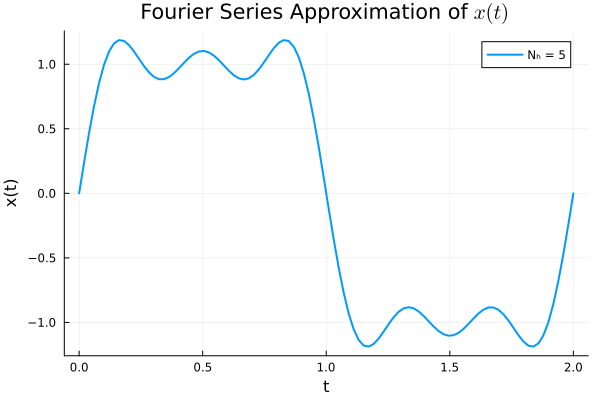

In [6]:
# Plot the result
plot(t, x_vals
    , label="Nₕ = $Nₕ"
    , title="Fourier Series Approximation of " * L"x(t)"
    , xlabel="t", ylabel="x(t)"
    , legend=:topright, linewidth=2
    , grid = :true
)

In [7]:
Nₕ = 1001  # Number of terms (harmonics) in the Fourier series

# Compute x(t) for the given time range and N_max
x_vals = [(∑((4 / (n * π)) * sin(n * π * tₙ) for n in 1:2:Nₕ)) for tₙ in t]; @show x_vals;

x_vals = [0.0, 0.992645169548864, 0.9997220334336773, 1.0021852247096372, 1.0025173227683175, 1.0016043208175653, 1.0002474989213042, 0.9991450574609244, 0.9987172945992296, 0.9990103966658477, 0.9997459547837663, 1.0004931938608195, 1.0008831215964373, 1.0007691178901021, 1.0002683625542592, 0.9996764914386507, 0.9993060223623084, 0.9993306928405711, 0.9997095566362705, 1.0002222058697965, 1.0005912958822538, 1.0006273393437506, 1.000322673157296, 0.9998493514273373, 0.9994649211486293, 0.9993760564998706, 0.9996303401502733, 1.000091440477845, 1.0005103170529173, 1.0006561808579157, 1.0004401041619586, 0.9999669363716814, 0.9994865590102344, 0.9992663632997799, 0.9994480561976246, 0.9999626156383613, 1.000551081164001, 1.0008875190272573, 1.0007483525241205, 1.0001449807260376, 0.9993487690426449, 0.9987851055145178, 0.9988350299483422, 0.9996299120513009, 1.0009332143084066, 1.0021659074132727, 1.0025573534399934, 1.0012913941229824, 0.9971604958270376, 0.9812132346479012, -0.981213

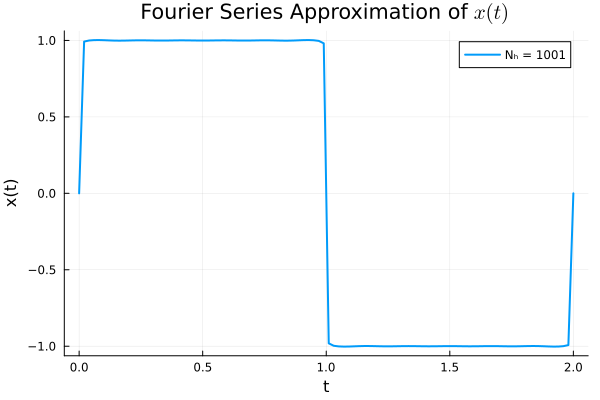

In [8]:
# Plot the result
plot(t, x_vals
    , label="Nₕ = $Nₕ"
    , title="Fourier Series Approximation of " * L"x(t)"
    , xlabel="t", ylabel="x(t)"
    , legend=:topright, linewidth=2
    , grid = :true
)

To integrate the Laplace Expression:

$
X(s) = \int_0^\infty \exp(-\alpha t) \exp(-s t) \, dt
$

### Step-by-Step Solution:

1. Combine the exponentials:
   $
   \exp(-\alpha t) \exp(-s t) = \exp(-(\alpha + s) t)
   $

   Thus, the integral becomes:
   $
   X(s) = \int_0^\infty \exp(-(\alpha + s) t) \, dt
   $

2. Now, we integrate $ \exp(-(\alpha + s) t) $ with respect to $ t $:
   $
   \int \exp(-(\alpha + s) t) \, dt = \frac{-1}{\alpha + s} \exp(-(\alpha + s) t)
   $

3. Apply the limits $ t = 0 $ to $ t = \infty $:
   $
   X(s) = \left[ \frac{-1}{\alpha + s} \exp(-(\alpha + s) t) \right]_0^\infty
   $

   - At $ t = \infty $, $ \exp(-(\alpha + s) \cdot \infty) = 0 $ (since $ \alpha + s > 0 $).
   - At $ t = 0 $, $ \exp(-(\alpha + s) \cdot 0) = 1 $.

4. Substituting the limits:
   $
   X(s) = \left( 0 - \frac{-1}{\alpha + s} \right) = \frac{1}{\alpha + s}
   $

### Final Answer:

$
X(s) = \frac{1}{\alpha + s}
$

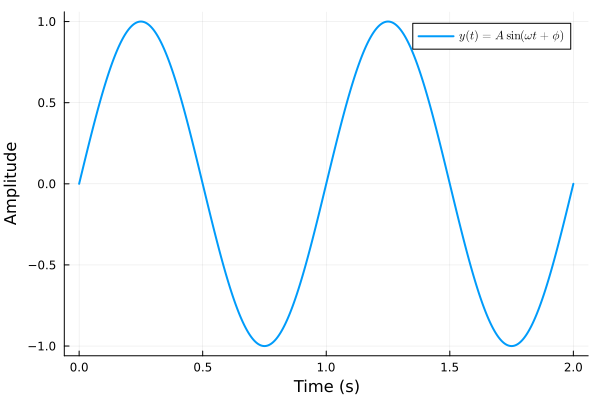

In [9]:
using Plots

# Parameters for the sinusoidal function
A = 1.0          # Amplitude
f = 1.0
# Frequency (Hz)
ω = 2π * f       # Angular frequency (rad/s)
φ = 0.0          # Phase shift (radians)
T = 1.0 / f      # Period (seconds)
τ = range(0, stop=2T, length=1000)  # Time range for two periods

# Define the sinusoidal function y(t) = A * sin(ω * t + φ)
y = sin.(ω .* τ .+ φ)

# Plot the sinusoidal function
plot(τ, y
    , label = L"y(t) = A \; \sin(\omega t + \phi)"
    , xlabel="Time (s)", ylabel="Amplitude"
    , linewidth=2, legend=:topright
)

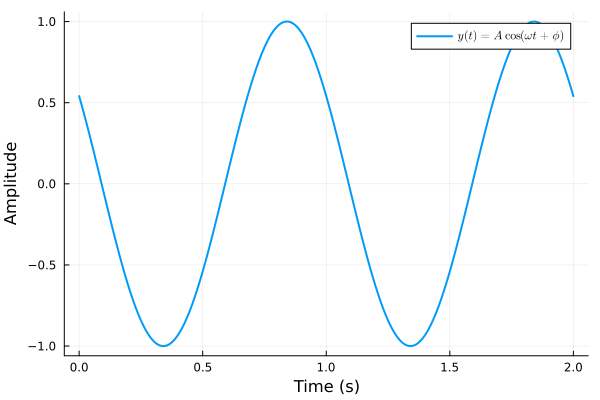

In [10]:
using Plots

# Parameters for the cosine function
A = 1.0          # Amplitude
f = 1.0          # Frequency (Hz)
ω = 2π * f       # Angular frequency (rad/s)
φ = 1.0          # Phase shift (radians)
T = 1.0 / f      # Period (seconds)
τ = range(0, stop=2T, length=1000)  # Time range for two periods

# Define the cosine function y(t) = A * cos(ω * t + φ)
y = A * cos.(ω .* τ .+ φ)

# Plot the cosine function
plot(τ, y
    , label=L"y(t) = A \; \cos(\omega t + \phi)"
    , xlabel="Time (s)", ylabel="Amplitude"
    , linewidth=2, legend=:topright
)

The **trigonometric Fourier series representation** of a sawtooth wave can be derived similarly to other periodic functions, using sine and cosine terms. For a sawtooth wave with period $ T $ that linearly ramps from a peak value down to zero (or negative), the function has an asymmetry that results in a Fourier series with both sine and cosine terms.

### Sawtooth Wave Definition

For simplicity, let's consider a **sawtooth wave** $ x(t) $ with:
- Period $ T $,
- Amplitude $ A $,
- Linear behavior within each period from $ x(t) = A $ at $ t = 0 $ to $ x(t) = -A $ at $ t = T $.

This means $ x(t) $ can be defined as:
$
x(t) = \frac{2A}{T} \left( t - \frac{T}{2} \right), \quad 0 \leq t < T.
$

The function repeats with period $ T $.

### Fourier Series Representation

The trigonometric Fourier series for a periodic function $ x(t) $ with period $ T $ is:

$
x(t) = \frac{A_0}{2} + \sum_{n=1}^{\infty} \left( A_n \cos(n \omega_0 t) + B_n \sin(n \omega_0 t) \right),
$

where:
- $ A_0 $ is the DC component (average value of $ x(t) $ over one period),
- $ A_n $ and $ B_n $ are the Fourier coefficients for the cosine and sine terms, respectively,
- The fundamental angular frequency $ \omega_0 = \frac{2 \pi}{T} $.

### Step 1: Compute the DC Component $ A_0 $

The DC component $ A_0 $ is given by:

$
A_0 = \frac{2}{T} \int_0^T x(t) \, dt.
$

Since $ x(t) $ oscillates symmetrically around zero, the average over one period is zero:

$
A_0 = 0.
$

### Step 2: Compute the Cosine Coefficients $ A_n $

The coefficients $ A_n $ are given by:

$
A_n = \frac{2}{T} \int_0^T x(t) \cos(n \omega_0 t) \, dt.
$

Since the sawtooth wave is an **odd function** (symmetric with respect to the origin, but with opposite signs on either side), only the **sine terms** contribute to the Fourier series (all $ A_n = 0 $).

### Step 3: Compute the Sine Coefficients $ B_n $

The sine coefficients $ B_n $ are given by:

$
B_n = \frac{2}{T} \int_0^T x(t) \sin(n \omega_0 t) \, dt.
$

Substitute $ x(t) = \frac{2A}{T} \left( t - \frac{T}{2} \right) $ and $ \omega_0 = \frac{2 \pi}{T} $:

$
B_n = \frac{2}{T} \int_0^T \frac{2A}{T} \left( t - \frac{T}{2} \right) \sin\left( \frac{2 \pi n}{T} t \right) \, dt.
$

This integral, after simplification, results in:

$
B_n = \frac{-4A}{n \pi}.
$

### Final Fourier Series Representation

Thus, the Fourier series for a sawtooth wave $ x(t) $ with period $ T $ and amplitude $ A $ is:

$
x(t) = \sum_{n=1}^{\infty} \frac{-4A}{n \pi} \sin\left( \frac{2 \pi n}{T} t \right).
$

Alternatively, we can rewrite this as:

$
x(t) = -\frac{4A}{\pi} \left( \sin\left( \frac{2 \pi}{T} t \right) + \frac{1}{2} \sin\left( \frac{4 \pi}{T} t \right) + \frac{1}{3} \sin\left( \frac{6 \pi}{T} t \right) + \dots \right).
$

### Summary

The trigonometric Fourier series for a sawtooth wave with amplitude $ A $ and period $ T $ is:

$
x(t) = -\frac{4A}{\pi} \sum_{n=1}^{\infty} \frac{1}{n} \sin\left( \frac{2 \pi n}{T} t \right),
$

where $ n $ takes on all positive integers. This series converges to the sawtooth waveform as more terms are added.

In [11]:
# Define the Fourier series approximation of the sawtooth wave
function sawtooth_wave(t, A, T, num_terms)
    ω₀ = 2 * π / T  # Fundamental angular frequency
    xₜ = 0.0        # Initialize the wave value

    # Sum the Fourier series terms
    for n in 1:num_terms
        xₜ += (-4 * A / (n * π)) * sin(n * ω₀ * t)
    end

    return xₜ
end

sawtooth_wave (generic function with 1 method)

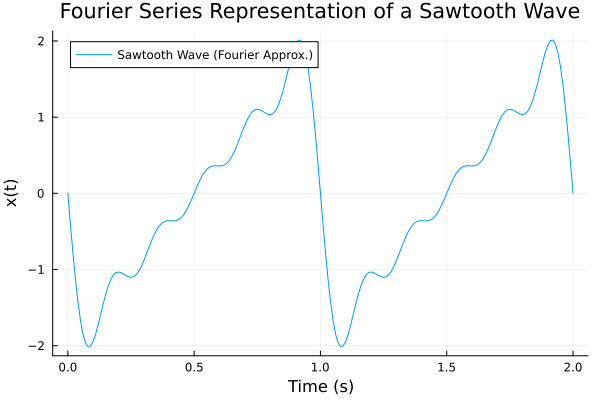

In [12]:
# Example usage:
A = 1.0             # Amplitude of the sawtooth wave
T = 1.0             # Period of the sawtooth wave
num_terms = 5      # Number of terms for the Fourier series approximation
t = 0:0.01:2      # Time vector over two periods

# Calculate x(t) over the time range
xt_values = [sawtooth_wave(tᵢ, A, T, num_terms) for tᵢ in t]

# Plot the result
plot(t, xt_values
    , label="Sawtooth Wave (Fourier Approx.)"
    , xlabel="Time (s)", ylabel="x(t)"
    , title="Fourier Series Representation of a Sawtooth Wave"
)
